In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = mglearn.datasets.load_extended_boston()

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The training set score
print("OLS training set score: {:.2f}".format(regr.score(X_train, y_train)))
# The test set score
print("OLS test set score: {:.2f}".format(regr.score(X_test, y_test)))

# Train the model using the training sets
ridge = linear_model.Ridge().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = ridge.predict(X_test)

# The training set score
print("Ridge training set score: {:.2f}".format(ridge.score(X_train, y_train)))
# The test set score
print("Ridge test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Train the model using the training sets
lasso = linear_model.Lasso().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lasso.predict(X_test)

# The training set score
print("Lasso training set score: {:.2f}".format(lasso.score(X_train, y_train)))
# The test set score
print("Lasso test set score: {:.2f}".format(lasso.score(X_test, y_test)))
# The number of features used
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
# The value of alpha 
print("Value of alpha: {}".format(1))

# Train the model using the training sets with smaller alpha
lasso001 = linear_model.Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
# Make predictions using the testing set
y_pred = lasso001.predict(X_test)

# The training set score
print("Lasso training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
# The test set score
print("Lasso test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
# The number of features used
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
# The value of alpha 
print("Value of alpha: {}".format(0.01))

# Train the model using the training sets with even smaller alpha
lasso00001 = linear_model.Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
# Make predictions using the testing set
y_pred = lasso00001.predict(X_test)

# The training set score
print("Lasso training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
# The test set score
print("Lasso test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
# The number of features used
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))
# The value of alpha 
print("Value of alpha: {}".format(0.0001))

OLS training set score: 0.95
OLS test set score: 0.61
Ridge training set score: 0.89
Ridge test set score: 0.75
Lasso training set score: 0.29
Lasso test set score: 0.21
Number of features used: 4
Value of alpha: 1
Lasso training set score: 0.90
Lasso test set score: 0.77
Number of features used: 33
Value of alpha: 0.01
Lasso training set score: 0.95
Lasso test set score: 0.64
Number of features used: 96
Value of alpha: 0.0001


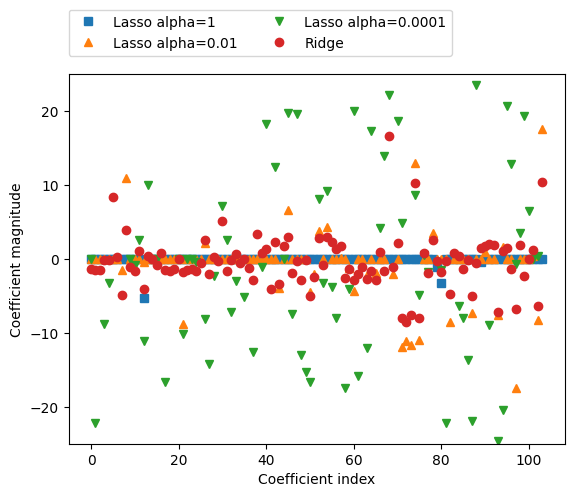

In [18]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge.coef_, 'o', label="Ridge")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Save the figure as SVG 
plt.savefig("cof.svg")